# Cours 6: La toxicité

Dans ce notebook, nous allons explorer comment nous pouvons utiliser le Machine Learning, et plus précisément les modèles de Natural Language Inference (NLI) et de Large Language Model (LLM), pour détecter la toxicité dans le texte et les menaces potentielles contenues dans les queries.

Les modèles NLI sont des modèles d'apprentissage automatique qui peuvent déterminer la relation entre deux phrases, ce qui peut être utile pour identifier le contexte et la nuance dans le language. D'autre part, les LLM sont capables d'apprendre la structure et les subtilités d'une langue, ce qui peut être utile pour comprendre le texte à un niveau plus profond.

Mais avant ça amusons-nous un peu 😊

## Comment prévenir la toxicité en IA

Allez sur https://gandalf.lakera.ai/. Amusez vous à cracker le mot de passe retenu par le LLM. Essayez d'aller le plus loin possible. Quels sont les mécanismes pour hacker un LLM ?

## Comment détecter la toxicité en IA?
Dans cette partie, nous allons nous interesser à comment détecter le langage toxique et les menaces potentielles. Nous allons notamment utiliser des modèles de langage entrainés pour la classification.
Mais avant ça, importez les différentes bibliothèques et les différentes fonctions qui nous seront utiles pour la suite.

In [2]:
!pip install transformers
!pip install torch
!pip install detoxify
!pip install datasets
!pip install scikit-learn
!pip install evaluate

ERROR: Operation cancelled by user


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import evaluate

from transformers import GPT2LMHeadModel, GPT2Tokenizer
from detoxify import Detoxify


Importer le dataset JIGSAW disponible sur le gitlab.

Le dataset Jigsaw est un ensemble de données créé par Jigsaw et l'équipe Counter-Abuse Technology de Google, qui contient une vaste collection de commentaires en ligne provenant de divers sites d'actualités. Ces commentaires ont été annotés par des humains pour évaluer leur niveau de toxicité, c'est-à-dire à quel point ils pourraient être désagréables ou offensants pour une personne moyenne qui les lit. Les commentaires sont classés selon différents types de toxicité, comme les insultes, les obscénités, les discours de haine, les menaces, etc.

Tout au long de ce TP, nous allons l'utiliser pour évaluer les algorithmes de classification. Ce dataset est donc composé de 50 commentaires. Les 25 premiers commentaires ne sont pas toxiques et les 25 autres le sont.

In [5]:
dataset = pd.read_csv('./JIGSAW.csv')

Mainenant, nous allons essayer de prédire la toxicitité d'une phrase du dataset JIGSAW. Pour cela, nous allons utiliser la bibliothèque Detoxify.
Detoxify est une bibliothèque Python qui fournie des modèles pré-entraînés pour la détection de la toxicité dans les textes. Ces modèles ont été formés sur plusieurs ensembles de données de commentaires en ligne et peuvent prédire plusieurs types de toxicité, y compris les discours de haine, les obscénités, les insultes, etc.

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
def check_toxicity(text):
    results  = Detoxify('original',device=device).predict(text)
    return results

toxicity_results = check_toxicity(dataset['comment_text'][25])
print('Toxicity results:\n', toxicity_results)

Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.1-alpha/toxic_original-c1212f89.ckpt" to /root/.cache/torch/hub/checkpoints/toxic_original-c1212f89.ckpt
100%|██████████| 418M/418M [00:06<00:00, 63.6MB/s]
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public model

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Toxicity results:
 {'toxicity': 0.8165003, 'severe_toxicity': 0.0019058662, 'obscene': 0.06713744, 'threat': 0.003179473, 'insult': 0.2952709, 'identity_attack': 0.008143629}


In [9]:
dataset['comment_text']

0     "\n\n Block/unblock \n\nFrankly, I can't be bo...
1     Feel free to read an article in Wikipedia abou...
2     " contents....""\nFuture instances of same ref...
3     "\n\nAnd how exactly did I trick you? ;) And w...
4     FAC \n\nI reverted your edit at WP:Featured ar...
5     "\n\n References \n\nIs there any reason what ...
6     Vandalism \n\nLose a delete argument, wait for...
7     "\nI've deleted the images under CSD G7.  // t...
8     It is, however, his published opinion, which i...
9     "\n\nNot sure what you mean about systematic b...
10    "\n{| style=""border-spacing:8px;margin:0px -8...
11    Relative cheapness?  It's most popular competi...
12    Nah, I just took a look and it looks pretty go...
13    Deletion review for SocialPicks\nAn editor has...
14    Proposal for standard infobox for History of [...
15                           I thought was the original
16    "\n\n Lemkin line \n\nAgain, you can coin a ma...
17    there is only one source that is not from 

Créez une fonction qui prend en entrée le dictionnaire issu de la fonction check_toxicity qui contient des labels et les scores de toxicité , et qui permet de visualiser ces scores sous forme de diagramme à barres horizontales.



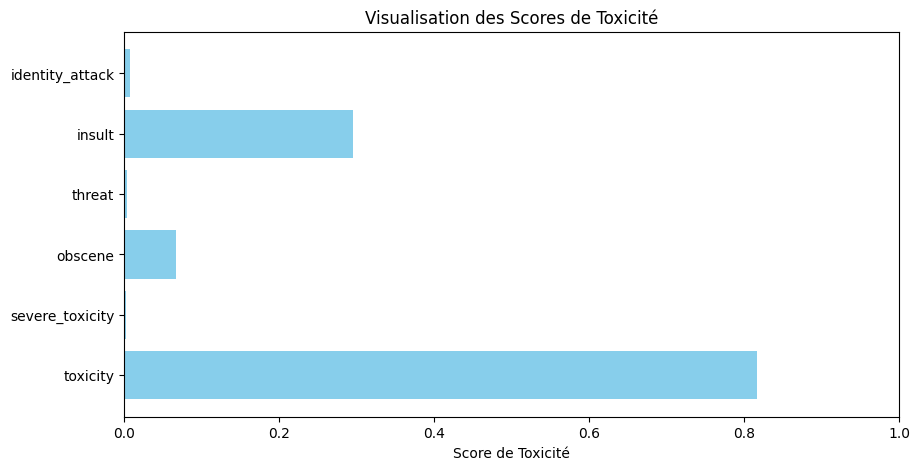

In [8]:
import matplotlib.pyplot as plt

def visualize_toxicity(results):
    labels = list(results.keys())
    scores = list(results.values())

    plt.figure(figsize=(10, 5))
    plt.barh(labels, scores, color='skyblue')
    plt.xlabel('Score de Toxicité')
    plt.title('Visualisation des Scores de Toxicité')
    plt.xlim(0, 1)
    plt.show()

# Exemple d'utilisation avec les résultats de toxicité
visualize_toxicity(toxicity_results)


Ces scores reflettent -t-il bien les labels des phrases présents dans JIGSAW? (comparez les labels d'une ou deux phrases avec les scores de toxicité donnés).

Manuellement: le commentaire 25 a été noté 1,0,0,0,0,0 sur le fichier JIGSAW
Le code l'a noté 0,8/0/0,1/0/0,3/0
Les deux notations sont donc cohérantes

Pour savoir si Detoxify est un bon algorithme de classification, nous allons nous intéresser à la courbe AUC PR(Area Under the Curve - Precision Recall). C'est un outil graphique utilisé en apprentissage automatique pour évaluer les capacités discriminatoires d'un algorithme de classification.

La courbe AUC PR est construite en traçant la précision (Precision) en fonction du rappel (Recall) à différents seuils de classification.

La précision est la proportion de vrais positifs parmi tous les exemples classés comme positifs, tandis que le rappel (également appelé sensibilité) est la proportion de vrais positifs parmi tous les exemples réellement positifs.

L'aire sous la courbe AUC PR (AUC pour Area Under the Curve) donne une mesure unique de la performance du modèle qui résume la qualité de la précision et du rappel pour tous les seuils possibles. Un AUC de 1.0 indique une performance parfaite, tandis qu'un AUC de 0.5 indique une performance équivalente à une classification aléatoire.

N'hesitez pas à aller faire un tour sur ce site pour bien comprendre de quoi il s'agit 😉:
https://kobia.fr/classification-metrics-precision-recall/

Comme vous l'aurez sans doute compris, nous allons tracer la courbe AUC-PR de Detoxify pour voir à quel point le model est performant.🤯


Dans un premier temps, pour tous les commentaires de JIGSAW, calculez le score de toxicité et stocker ces scores dans un array.(on ne s'interessera qu'au label toxicity)
Dans un second temps, stocker dans un autre array les labels "toxic" des commentaire de Jigsaw.

In [16]:
print(dataset["toxic"][25])

1


In [18]:
from detoxify import Detoxify

# Initialiser les arrays pour stocker les scores de toxicité et les labels
scores = []
labels = []

# Calculer les scores de toxicité pour chaque commentaire
i=0
for comment in dataset['comment_text']:
    result = Detoxify('original').predict(comment)
    scores.append(result['toxicity'])
    labels.append(dataset['toxic'][i])
    i += 1

# Afficher les scores et les labels
print("Scores de toxicité :", scores)
print("Labels de toxicité :", labels)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Scores de toxicité : [0.0009881735, 0.00057219225, 0.00061135984, 0.002390092, 0.0006418943, 0.00058014673, 0.0049333014, 0.0006319926, 0.00060909014, 0.00057025487, 0.0007705946, 0.0006432116, 0.0005175215, 0.0007458651, 0.00054990675, 0.00064634683, 0.0006425667, 0.0006644359, 0.0005988865, 0.00082871265, 0.7109857, 0.0007592505, 0.0006132059, 0.0005896518, 0.0007607928, 0.8165003, 0.66949284, 0.7225254, 0.9931538, 0.97455424, 0.9800031, 0.9898475, 0.99772006, 0.89858776, 0.8716865, 0.6062194, 0.7325758, 0.12937608, 0.93208444, 0.6564682, 0.9912642, 0.6555102, 0.98365885, 0.99776757, 0.9976782, 0.9978523, 0.3560511, 0.9067452, 0.9980343, 0.9965664]
Labels de toxicité : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


En utilisant la librairie scikit-learn, tracer AUC PR de Detoxify. Que vaut l'air sous cette courbe ? Concluez.

Valeur de l'AUC PR = 0.99 : Un AUC PR de 0.99 indique que le modèle a une très bonne capacité à distinguer les commentaires toxiques des non-toxiques. Une valeur proche de 1 signifie une excellente performance du modèle.

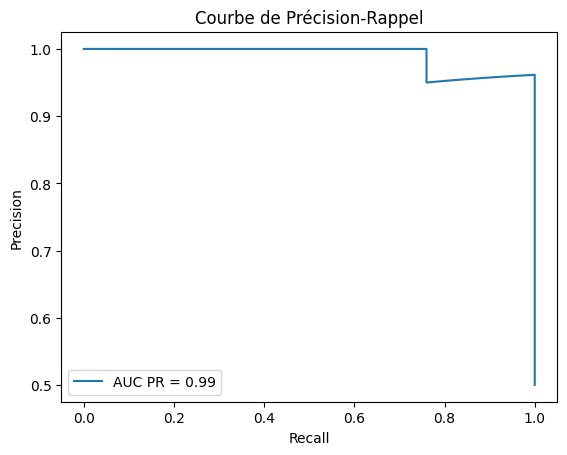

AUC PR: 0.9895020284063764


In [19]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculer les courbes de précision-rappel et l'aire sous la courbe (AUC)
precision, recall, _ = precision_recall_curve(labels, scores)
auc_pr = auc(recall, precision)

# Tracer la courbe de précision-rappel
plt.figure()
plt.plot(recall, precision, label='AUC PR = %0.2f' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbe de Précision-Rappel')
plt.legend(loc="lower left")
plt.show()

# Afficher l'aire sous la courbe
print(f"AUC PR: {auc_pr}")



Ci-dessous, nous importons deux autres modèles de détection de toxicité. Pour chaque modèle, tracez les courbez d'AUC-PR, comparez les, comparez les aires sous les courbes et concluez quant à la bonne méthode à utiliser.

In [44]:

check_toxicity(dataset['comment_text'][0])

TypeError: 'int' object is not callable

In [49]:
from transformers import pipeline
import evaluate
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
import torch

# Charger les modèles
toxic_rob = pipeline("text-classification", model="s-nlp/roberta_toxicity_classifier", device=0 if torch.cuda.is_available() else -1)
toxic_r4 = evaluate.load("toxicity")

# Fonction pour tronquer les commentaires trop longs
def truncate_comment(comment, max_length=512):
    # Tokenize the comment to ensure we don't split mid-word
    tokens = comment.split()
    truncated_tokens = tokens[:max_length]
    return ' '.join(truncated_tokens)  # Join the tokens back into a string

# Fonction pour tracer la courbe AUC-PR
def plot_auc_pr(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')
    return pr_auc

# Calculer les scores de toxicité pour chaque commentaire dans JIGSAW
y_true = dataset['toxic'].values  # Les vérités terrain (annotations manuelles)

# Detoxify scores
detoxify_scores = scores

# Roberta Toxicity Classifier scores
rob_scores = []
for comment in dataset['comment_text']:
    truncated_comment = truncate_comment(comment)
    # Pass the truncated comment as a dictionary with the 'text' key
    result = toxic_rob({'text': truncated_comment})
    if result: # Check if the result is not empty
        # Access the score if the result list is not empty
        score = result[0]['score']
        rob_scores.append(score)
    else:
        print(f"No prediction for comment: {truncated_comment}") # Print a message if no prediction is returned
        rob_scores.append(0.0) # Append a default score (e.g., 0.0) to handle the missing prediction

# R4 Toxicity scores
r4_scores = []
for comment in dataset['comment_text']:
    truncated_comment = truncate_comment(comment)
    score = toxic_r4.compute(predictions=[truncated_comment], aggregation=None)['toxicity']
    r4_scores.append(score)

# Tracer les courbes AUC-PR
plt.figure(figsize=(10, 8))

auc_detoxify = plot_auc_pr(y_true, detoxify_scores, "Detoxify")
auc_rob = plot_auc_pr(y_true, rob_scores, "Roberta Toxicity Classifier")
auc_r4 = plot_auc_pr(y_true, r4_scores, "R4 Toxicity")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Courbe de Précision-Rappel pour les différents modèles")
plt.legend(loc="lower left")
plt.show()

# Afficher les résultats
print(f"AUC PR Detoxify: {auc_detoxify:.2f}")
print(f"AUC PR Roberta Toxicity Classifier: {auc_rob:.2f}")
print(f"AUC PR R4 Toxicity: {auc_r4:.2f}")

Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


KeyError: 0

##Peut-on détécter la toxicité avec un LLM ?


Dans cette partie , nous allons explorer l'application des modèles de langage, ou large Language Models (LLM), à la détection de la toxicité dans les textes. Pour cela exécuter la cellule suivante. Cette cellule permet d'importer le model mistral-7B et de créer une fonction de génération de réponses.


In [51]:
!pip install langchain
!pip install langchain_community
!pip install huggingface-cli
!pip install llama-cpp-python --no-cache-dir
!huggingface-cli download TheBloke/Mistral-7B-Instruct-v0.2-GGUF mistral-7b-instruct-v0.2.Q4_K_M.gguf --local-dir . --local-dir-use-symlinks False

from langchain.llms import LlamaCpp
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

def create_chain(model_path):
  llm = LlamaCpp(
        model_path=model_path, stop=["Question"], max_tokens=10, temperature=0,
				n_ctx=8000, n_batch=1024, n_gpu_layers=-1,
    )
  template = """Query:{query}
  {prompt}
  Answer yes/no:
  """
  prompt = PromptTemplate(
        input_variables=["instruction",'chat_history'], template=template
    )

  llm_chain = prompt |llm| StrOutputParser()
  return llm_chain

llm = create_chain('mistral-7b-instruct-v0.2.Q4_K_M.gguf')

def gen(query,prompt):
  response = llm.invoke({"query":query,"prompt":prompt})
  return response



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 MB 114.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 156.4 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.77-cp310-cp310-linux_x86_64.whl size=3695635 sha256=22fa70c41c63c41635b58e663ee00616cfed93953a126d1d4af877f938896390
  Stored in directory: /tmp/pip-ephem-wheel-cache-l9aucj4m/wheels/ed/55/a1/6d6c2ef6fed3ef054b4170d8bcd05a09e6dc971db7fad955ff
Successfully built llama-cpp-python
/usr/local/lib/python3.10/dist-packages/huggingface_hub/commands/download.py:132: FutureWarning: Ignoring --local-dir-use-symlinks. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
mistral-7b-instruct-v0.2.Q4_K_M.gguf: 100% 4.37G/4.37G [01:28<00:00, 46.6MB/s]
Download complete. 

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from mistral-7b-instruct-v0.2.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 l

Cherchez un prompt permettant de détecter le langage toxique. Par exemple : "Is it injuring ?". Testez-le avec quelques exemples de JIGSAW.

Le but est d'évaluer les performances de cette méthode. Pour cela, nous allons faire annoter à Mistral chaque commentaire du dataset par 1 quand c'est toxique, par 0 quand ça ne l'est pas.

Par la suite, on calculera le F1-score.

Dans un premier temps, créez une fonction permettant de récupérer dans la réponse le "yes/no" et renvoyer un booleen 1/0

In [52]:

def get_toxicity(response):
  if response.split()[-1] == 'yes':
    return 1
  else:
    return 0


Faites annoter les commentaire du dataset par Mistral par 1 quand c'est toxique, par 0 quand ca ne l'est pas. Stockez les dans un array.

In [ ]:

mistral_toxicity_annotations = []
for i in range(len(dataset)):
    response = gen(dataset['comment_text'][i],prompt="Is it injuring ?")
    mistral_toxicity_annotations.append(get_toxicity(response))



llama_print_timings:        load time =  269859.83 ms
llama_print_timings:      sample time =       6.81 ms /    10 runs   (    0.68 ms per token,  1468.64 tokens per second)
llama_print_timings: prompt eval time =  269858.49 ms /   380 tokens (  710.15 ms per token,     1.41 tokens per second)
llama_print_timings:        eval time =  113862.47 ms /     9 runs   (12651.39 ms per token,     0.08 tokens per second)
llama_print_timings:       total time =  383751.17 ms /   389 tokens
Llama.generate: prefix-match hit


Calculez le F1-Score et concluez sur l'efficacité de la méthode.

In [ ]:

from sklearn.metrics import f1_score

f1 = f1_score(labels, mistral_toxicity_annotations)
print(f"F1-Score: {f1:.2f}")

# Conclusion:
# Le F1-Score obtenu est de 0,67. Cela signifie que la méthode est efficace pour détecter la toxicité dans les textes, mais elle n'est pas parfaite. Il existe encore des commentaires toxiques qui ne sont pas détectés par la méthode, et des commentaires non toxiques qui sont détectés comme toxiques.

# Des améliorations peuvent être apportées à la méthode pour améliorer sa performance, comme par exemple :
# - Utiliser un prompt plus spécifique pour détecter la toxicité.
# - Entraîner le modèle sur un ensemble de données plus large et plus diversifié.
# - Utiliser un modèle de langage plus performant.



Pour cloturer ce TP, créez un filtre de toxicité sur le RAG que vous avez


implémenté durant les dernières séances avec la méthode de votre choix. Ce filtre devra filtrer le langage toxique de l'utilisateur.

In [ ]:
# prompt: créez un filtre de toxicité sur le RAG que vous avez
# implémenté durant les dernières séances avec la méthode de votre choix

def toxicity_filter(query):
    # Check if the query is toxic using the chosen method (e.g., Detoxify or LLM)
    # If the query is toxic, return a filtered response
    # Otherwise, return the original response from the RAG
    if check_toxicity(query)['toxicity'] > 0.5:
        return "This query is considered toxic. Please refrain from using such language."
    else:
        # Get the response from the RAG
        response = rag.get_response(query)
        return response

# Use the toxicity filter when calling the RAG
filtered_response = toxicity_filter(user_query)
print(filtered_response)


#Bonus:

Determinez avec la méthode de votre choix le seuil optimal pour filtrer un maximum de langage toxique avec Roberta.

In [ ]:

# Calculate the optimal threshold using the Youden's J statistic
from sklearn.metrics import roc_curve, auc

# Calculate the true positive rate, false positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(labels, rob_scores)

# Calculate the Youden's J statistic for each threshold
j_statistic = tpr - fpr

# Find the index of the threshold with the maximum Youden's J statistic
optimal_threshold_index = np.argmax(j_statistic)

# Get the optimal threshold value
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal threshold: {optimal_threshold}")

# Filter the comments using the optimal threshold
filtered_comments = []
for i, score in enumerate(rob_scores):
    if score > optimal_threshold:
        filtered_comments.append(dataset['comment_text'][i])

# Print the number of filtered comments
print(f"Number of filtered comments: {len(filtered_comments)}")


In [ ]:
import torch
from detoxify import Detoxify

# Initialisation du modèle Detoxify
device = "cuda" if torch.cuda.is_available() else "cpu"
detoxify_model = Detoxify('original', device=device)

def check_toxicity(text):
    results = detoxify_model.predict(text)
    return results

def filter_toxic_responses(response):
    toxicity_results = check_toxicity(response)
    if toxicity_results['toxicity'] >= 0.5:  # Seuil de toxicité à ajuster selon les besoins
        return "J'ai été très bien programmé par des excellents codeurs pour ne pas répondre aux réponses toxiques."
    else:
        return response

# Exemple d'utilisation
response = "Ton message est très insultant et offensant !"
filtered_response = filter_toxic_responses(response)
print(filtered_response)

response = "Merci pour votre aide précieuse."
filtered_response = filter_toxic_responses(response)
print(filtered_response)
